In [ ]:
import tweepy
import pandas as pd
import numpy as np
import re
from textblob import TextBlob
from wordcloud import WordCloud


In [ ]:
consumerKey = '9Ezv1ZK0ZvHbhGuIVsx8yE1j1'
consumerSecret = 'dUL12PXcwvBSha8zXxiopuhb9SIgK4jXFYFF2rnejz8nAZO3C6'
accessToken = '1490633689952231430-gDuJEQfUI3vrTTQ2Jcbub1dOzOKmOc'
accessTokenSecret = 'ZkySwYPqt8t7l4f4jFKYySx9lXEz90kGNTGxBBn0JvJ2A'

In [ ]:
authenticate=tweepy.OAuthHandler(consumerKey, consumerSecret)
authenticate.set_access_token(accessToken, accessTokenSecret)

In [ ]:
api = tweepy.API(authenticate, wait_on_rate_limit=True)

In [ ]:
posts = api.user_timeline(screen_name="NYPDnews", count=500, lang="en", tweet_mode="extended")

In [ ]:
for tweet in posts[0:5]:
  print(tweet.full_text + '\n')

This morning, the family, friends, and colleagues of Det. Anastasios Tsakos gathered @NYPDhighway District 3 to dedicate a plaque and sidecar to honor the life and legacy of our fallen hero. We will never forget Det. Tsakos' sacrifice for the citizens of New York City. https://t.co/NFyCRpZ4Vu

RT @nypdrecruit: REMINDER!!!! The sign up period for Traffic Safety Agent begins May 4th!!! Don’t miss out!!! #nypd #nypdrecruit https://t.…

The @NYPDSpecialops Aviation Unit is an advanced air-and-sea rescue &amp; law enforcement unit that provides tactical support to police officers on the ground and is always ready to be called on when needed. They also respond to calls within a 60-mile radius outside of NYC. https://t.co/e1FdKv8sCb

🚨WANTED for A ROBBERY PATTERN: In six separate incidents on 4/20/22 between 1 AM &amp; 2:20 AM in the Bronx, the suspects punched several women &amp; forcibly removed their purses before fleeing in a blue motorcycle. Have any info? DM @NYPDTips, or anonymously ca

In [ ]:
#creating a dataset
df_1 = pd.DataFrame( [tweet.full_text for tweet in posts], columns=['Tweets'] )
df_1.head()

,Tweets
0,"This morning, the family, friends, and colleagues of Det. Anastasios Tsakos gathered @NYPDhighway District 3 to dedicate a plaque and sidecar to honor the life and legacy of our fallen hero. We will never forget Det. Tsakos' sacrifice for the citizens of New York City. https://t.co/NFyCRpZ4Vu"
1,RT @nypdrecruit: REMINDER!!!! The sign up period for Traffic Safety Agent begins May 4th!!! Don’t miss out!!! #nypd #nypdrecruit https://t.…
2,The @NYPDSpecialops Aviation Unit is an advanced air-and-sea rescue &amp; law enforcement unit that provides tactical support to police officers on the ground and is always ready to be called on when needed. They also respond to calls within a 60-mile radius outside of NYC. https://t.co/e1FdKv8sCb
3,"🚨WANTED for A ROBBERY PATTERN: In six separate incidents on 4/20/22 between 1 AM &amp; 2:20 AM in the Bronx, the suspects punched several women &amp; forcibly removed their purses before fleeing in a blue motorcycle. Have any info? DM @NYPDTips, or anonymously call them at 800-577-TIPS. https://t.co/0eB5D3jfvo"
4,"🚨WANTED for an ASSAULT: On 3/19 AT 2:22 PM, onboard a train approaching the 190 St subway station, the suspect spat at a 22-year-old man, punched him several times &amp; ripped his hair from his head before making an anti-gay slur. Have any info? DM @NYPDTips\n, or call 800-577-TIPS. https://t.co/DKE17pnaJL"


In [ ]:
#READING 2ND DATA SOURCE

In [ ]:
posts_2 = api.user_timeline(screen_name="NYPDTips", count=1000, lang="en", tweet_mode="extended")

In [ ]:
# for tweet in posts_2[0:5]:
  # print(tweet.full_text + '\n')

import os
# print()
os.system("ls")

0

In [ ]:
#creating a dataset
df_2 = pd.DataFrame( [tweet.full_text for tweet in posts_2], columns=['Tweets'] )
df_2.head()
# df.shape
# df.to_csv("twitter_dataset.csv")
# df.shape

,Tweets
0,"🚨WANTED-ROBBERY Pattern: 6 incidents on 4/20/22 from 1AM-2:20AM various Bronx locations. The suspects forcibly removed female victim's handbags while riding around on a motorcycle. Any info call us at 800-577-TIPS or use our website https://t.co/TRPPY5zHV2 Reward up to $3,500 https://t.co/sv4CvyC7Le"
1,"RT @NYPDnews: 🚨WANTED for an ASSAULT: On 3/19 AT 2:22 PM, onboard a train approaching the 190 St subway station, the suspect spat at a 22-y…"
2,"🚨WANTED-GRAND LARCENY: 4/20/22 approx. 6:40 PM, 302 9 St @NYPD78PCT Brooklyn. The suspects stole various products &amp; money from the register at Newstand &amp; Vape. Any info call us at 800-577-TIPS or anonymously post a tip on our website https://t.co/TRPPY5zHV2 Reward up to $3,500 https://t.co/0bavDzH00V"
3,"🚨WANTED-SEX ABUSE: 4/16/22 approx. 4:20 AM, Avenue of Americas &amp; W 46 St @NYPDMTN Manhattan. The suspect pushed a 38 Y/O female victim &amp; grabbed her breasts. Any info call us at 800-577-TIPS or anonymously post a tip on our website https://t.co/TRPPY5zHV2 Reward up to $3,500 https://t.co/HxUa50CF1y"
4,"🚨WANTED-ROBBERY: 4/5/22 approx. 11:20 PM, south 'A' train between W 168 St &amp; W 125 St @NYPD30PCT Manhattan. The suspects displayed a knife &amp; took a 27 Y/O male victim's property. Any info call us at 800-577-TIPS or post a tip to https://t.co/TRPPY5zHV2 Reward up to $3,500 https://t.co/RvakKdHFqm"


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# tw = [tweet.full_text for tweet in posts2]
# df = pd.DataFrame( [tweet.full_text for tweet in posts ], columns=['Tweets'])

# def tweets_to_data_frame(tweets):
#         df = pd.DataFrame(tw ,columns=['tweets'])
#         # return df
#         df['id'] = np.array([tweet.id for tweet in tweets])
#         df['len'] = np.array([len(tweet.full_text) for tweet in tweets])
#         df['date'] = np.array([tweet.created_at for tweet in tweets])
#         df['source'] = np.array([tweet.source for tweet in tweets])
#         df['likes'] = np.array([tweet.favorite_count for tweet in tweets])
#         df['retweets'] = np.array([tweet.retweet_count for tweet in tweets])
#         return df

# df = tweets_to_data_frame(posts)
# df

In [ ]:
df = df_1.append(df_2, ignore_index=True)

In [ ]:
df_original = df_1.append(df_2, ignore_index=True)

In [ ]:
# delete later
#df = pd.read_csv('df_original_highlighted_csv.csv')
#df_original = pd.read_csv('df_original_highlighted_csv.csv')

In [ ]:
df.shape

(400, 1)

In [ ]:
df.tail()

,Tweets
395,"🚨WANTED🚨for a Robbery inside of the Jackson Avenue station, on the northbound #2,5 line platform #bronx On 3/16/22 @ 3:40 PM Reward up to $3500 Seen them? Know who they are? Call 1-800-577-TIPS or DM us! Calls are CONFIDENTIAL! #yourcityyourcall https://t.co/OO081O30Ye"
396,🚨WANTED🚨for an Attempted Murder &amp; Attempted Rape on West 123 Street between Lenox Avenue and Adam Clayton Boulevard #harlem #manhattan On 3/18/22 @ 11:30 PM Reward up to $3500 Seen him? Know who he is? Call 1-800-577-TIPS or DM us! Calls are CONFIDENTIAL! #yourcityyourcall https://t.co/8lEiqRczAE
397,WANTED for A Robbery in the vicinity of West 181 Street and Audubon Avenue. #Manhattan @NYPD34pct on 3/18/22 @ 12:57 PM Suspect approached victim displayed firearm and took her necklace and pendant. Reward up to $3500 Call 1-800-577-TIPS Calls are CONFIDENTIAL! https://t.co/ahfp6WMqKr
398,WANTED for A Forcible Touching in the vicinity of Sutter Avenue and Van Siclen Avenue . #Brooklyn @NYPD75pct on 2/11/22 @ 9:15 PM An unknown individual approached victim and grabbed her buttocks. Reward up $3500 Know who they are? Call 1-800-577-TIPS Calls are CONFIDENTIAL! https://t.co/NJwVJD3IW1
399,"WANTED for AN Robbery at 4520 Broadway street . #Manhattan @NYPD34pct on 3/18/22 @ 5:05 AM Reward up to $3500 an unknown individual entered the location and ordered food and when asked to pay , he displayed a firearm and demanded money. Call 1-800-577-TIPS CONFIDENTIAL! https://t.co/kfytfhUX0L"


In [ ]:
#cleaning the tweets
#removing unwanted characters

def clean(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text)
  text = re.sub(r'#', '', text)
  text = re.sub(r'RT[\s]+', '', text)
  text = re.sub(r'https?:\/\/\S+', '', text)
  text = re.sub(r'[^\w\s\/]', '', text)

  return text


df["Tweets"] = df["Tweets"].apply(clean)
df.head(10)

,Tweets
0,This morning the family friends and colleagues of Det Anastasios Tsakos gathered District 3 to dedicate a plaque and sidecar to honor the life and legacy of our fallen hero We will never forget Det Tsakos sacrifice for the citizens of New York City
1,REMINDER The sign up period for Traffic Safety Agent begins May 4th Dont miss out nypd nypdrecruit
2,The Aviation Unit is an advanced airandsea rescue amp law enforcement unit that provides tactical support to police officers on the ground and is always ready to be called on when needed They also respond to calls within a 60mile radius outside of NYC
3,WANTED for A ROBBERY PATTERN In six separate incidents on 4/20/22 between 1 AM amp 220 AM in the Bronx the suspects punched several women amp forcibly removed their purses before fleeing in a blue motorcycle Have any info DM or anonymously call them at 800577TIPS
4,WANTED for an ASSAULT On 3/19 AT 222 PM onboard a train approaching the 190 St subway station the suspect spat at a 22yearold man punched him several times amp ripped his hair from his head before making an antigay slur Have any info DM \n or call 800577TIPS
5,On March 15 2022 officers responded to a disorderly group of motorists in the Bronx While dispersing the group the suspects car struck a police vehicle amp fled the scene Thanks to great investigative work by the officers the individual was apprehended for this incident
6,Field Intelligence Officers from amp South Narcotics Violent Crimes conducted a search warrant amp recovered these illegal firearms w/ high capacity magazines Across the five boroughs our officers are committed to keeping this city safe from gun violence
7,Please click on the link below for details on Firefighter Timothy Kleins wake amp funeral\n\n\n
8,The name Uniting Clergy Community and Police Coalition defines the spirit of these great New Yorkers who work as our partne
9,Members of the Highway Patrol held a candle lighting ceremony this morning in honor and remembrance of our brother Detecti


In [ ]:
#converting all tweets to lower case
df["Tweets"] = df["Tweets"].str.lower()

In [ ]:
#tokenization
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def tokenize(text):
  return nltk.word_tokenize(text)

df["Tokenized_Tweets"] = df["Tweets"].apply(tokenize)
df.head()

,Tweets,Tokenized_Tweets
0,this morning the family friends and colleagues of det anastasios tsakos gathered district 3 to dedicate a plaque and sidecar to honor the life and legacy of our fallen hero we will never forget det tsakos sacrifice for the citizens of new york city,"[this, morning, the, family, friends, and, colleagues, of, det, anastasios, tsakos, gathered, district, 3, to, dedicate, a, plaque, and, sidecar, to, honor, the, life, and, legacy, of, our, fallen, hero, we, will, never, forget, det, tsakos, sacrifice, for, the, citizens, of, new, york, city]"
1,reminder the sign up period for traffic safety agent begins may 4th dont miss out nypd nypdrecruit,"[reminder, the, sign, up, period, for, traffic, safety, agent, begins, may, 4th, dont, miss, out, nypd, nypdrecruit]"
2,the aviation unit is an advanced airandsea rescue amp law enforcement unit that provides tactical support to police officers on the ground and is always ready to be called on when needed they also respond to calls within a 60mile radius outside of nyc,"[the, aviation, unit, is, an, advanced, airandsea, rescue, amp, law, enforcement, unit, that, provides, tactical, support, to, police, officers, on, the, ground, and, is, always, ready, to, be, called, on, when, needed, they, also, respond, to, calls, within, a, 60mile, radius, outside, of, nyc]"
3,wanted for a robbery pattern in six separate incidents on 4/20/22 between 1 am amp 220 am in the bronx the suspects punched several women amp forcibly removed their purses before fleeing in a blue motorcycle have any info dm or anonymously call them at 800577tips,"[wanted, for, a, robbery, pattern, in, six, separate, incidents, on, 4/20/22, between, 1, am, amp, 220, am, in, the, bronx, the, suspects, punched, several, women, amp, forcibly, removed, their, purses, before, fleeing, in, a, blue, motorcycle, have, any, info, dm, or, anonymously, call, them, at, 800577tips]"
4,wanted for an assault on 3/19 at 222 pm onboard a train approaching the 190 st subway station the suspect spat at a 22yearold man punched him several times amp ripped his hair from his head before making an antigay slur have any info dm \n or call 800577tips,"[wanted, for, an, assault, on, 3/19, at, 222, pm, onboard, a, train, approaching, the, 190, st, subway, station, the, suspect, spat, at, a, 22yearold, man, punched, him, several, times, amp, ripped, his, hair, from, his, head, before, making, an, antigay, slur, have, any, info, dm, or, call, 800577tips]"


In [ ]:
#removal of stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
def remove_stopwords(text_arr):
  for word in stop_words:
    while(word in text_arr):
      text_arr.remove(word)


  return text_arr

df["Without_Stopwords_Tweets"] = df["Tokenized_Tweets"].apply(remove_stopwords)
df.drop(columns='Tokenized_Tweets',axis=1,inplace=True)
df.head()

,Tweets,Without_Stopwords_Tweets
0,this morning the family friends and colleagues of det anastasios tsakos gathered district 3 to dedicate a plaque and sidecar to honor the life and legacy of our fallen hero we will never forget det tsakos sacrifice for the citizens of new york city,"[morning, family, friends, colleagues, det, anastasios, tsakos, gathered, district, 3, dedicate, plaque, sidecar, honor, life, legacy, fallen, hero, never, forget, det, tsakos, sacrifice, citizens, new, york, city]"
1,reminder the sign up period for traffic safety agent begins may 4th dont miss out nypd nypdrecruit,"[reminder, sign, period, traffic, safety, agent, begins, may, 4th, dont, miss, nypd, nypdrecruit]"
2,the aviation unit is an advanced airandsea rescue amp law enforcement unit that provides tactical support to police officers on the ground and is always ready to be called on when needed they also respond to calls within a 60mile radius outside of nyc,"[aviation, unit, advanced, airandsea, rescue, amp, law, enforcement, unit, provides, tactical, support, police, officers, ground, always, ready, called, needed, also, respond, calls, within, 60mile, radius, outside, nyc]"
3,wanted for a robbery pattern in six separate incidents on 4/20/22 between 1 am amp 220 am in the bronx the suspects punched several women amp forcibly removed their purses before fleeing in a blue motorcycle have any info dm or anonymously call them at 800577tips,"[wanted, robbery, pattern, six, separate, incidents, 4/20/22, 1, amp, 220, bronx, suspects, punched, several, women, amp, forcibly, removed, purses, fleeing, blue, motorcycle, info, dm, anonymously, call, 800577tips]"
4,wanted for an assault on 3/19 at 222 pm onboard a train approaching the 190 st subway station the suspect spat at a 22yearold man punched him several times amp ripped his hair from his head before making an antigay slur have any info dm \n or call 800577tips,"[wanted, assault, 3/19, 222, pm, onboard, train, approaching, 190, st, subway, station, suspect, spat, 22yearold, man, punched, several, times, amp, ripped, hair, head, making, antigay, slur, info, dm, call, 800577tips]"


In [ ]:
inverted_indexxx = []
df_inverted_index = pd.DataFrame(inverted_indexxx,columns=["Word","Tweet_Index","Count"])

In [ ]:
# creating an inverted index
def inverted_index(text_arr,doc_index):
  for word in text_arr:
    i = df_inverted_index.index[df_inverted_index['Word'] == word].to_list()
    if i:
      df_inverted_index.iloc[i[0]]["Tweet_Index"].append(doc_index)
      df_inverted_index.loc[i[0]]["Count"] = int(df_inverted_index.loc[i[0]]["Count"])+1
    else:
      df_inverted_index.loc[len(df_inverted_index.index)] = [word, [doc_index], 1]


In [ ]:
df_inverted_index

,Word,Tweet_Index,Count


In [ ]:
i = 0
for tweet_arr in df["Without_Stopwords_Tweets"]:
  inverted_index(tweet_arr,i)
  i+=1

In [ ]:
df_inverted_index.to_csv("inverted_index_tweets.csv")
df_inverted_index

,Word,Tweet_Index,Count
0,morning,"[0, 9, 19, 54, 76, 117, 131, 177]",8
1,family,"[0, 25, 27, 130, 224, 373]",6
2,friends,"[0, 27, 130]",3
3,colleagues,[0],1
4,det,"[0, 0, 12]",3
5,anastasios,"[0, 12]",2
6,tsakos,"[0, 0, 12]",3
7,gathered,[0],1
8,district,"[0, 29]",2
9,3,"[0, 213, 213, 359, 377]",5


In [ ]:
# #delete later
# docs = [["car","audi","kia","tata"],["car","merc","fiat","suzuki"],["apple","hyundai","bike","tata"]]
# d2 = ["car","merc","fiat","suzuki"]
# d3 = ["apple","hyundai","bike","tata"]
# query = "murder or wanted"

In [ ]:
docs = df["Tweets"]
query = "wanted or robbery or assault or gun or shot or wantedfor or forcibly or stabbed or firearm or arrested or punched or burglary or perpetrator or wantedrobbery or reckless or endangerment or arrest or struck or grabbed or guns or firearms or touching or loaded or dispute or crime or assaulted or forcible or killed or rifles or illegal or knife or buttocks or rape or fleeing or broke or lewdness or criminal or gang or pushed or robberies or handguns or hit or kicked or homicide or shotguns or wantedassault or larceny or stole or missing or murder or violence or ghost or harassment or fire or burglaries or violent or manslaughter or apprehension or stolen or assaults or murders or sharp or wantedassaults or shooting or chokehold or raped"

In [ ]:
# building Boolean Model
#creating a bitmap according to the given query
bitmap = []
words_all = query.split(' ')
words_required = []
words_connectors = []

for i in range(0,len(words_all)):
  if i%2==0:
    words_required.append(words_all[i])
  else:
    words_connectors.append(words_all[i])

query_len = len(words_required)

for tweet in docs:
  temp = []
  for word in words_required:
    if word in tweet:
      temp.append(1)
    else:
      temp.append(0)
  bitmap.append(temp)
bitmap

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [1,
  

In [ ]:
bitmap_results = []
for doc in bitmap:
  for i in range(0,query_len-1):
    if i==0:
      if words_connectors[i]=="and":
        result = doc[i] & doc[i+1]
      else:
        result = doc[i] | doc[i+1]
    elif words_connectors[i]=="and":
      result = result & doc[i+1]
    else:
      result = result | doc[i+1]
  bitmap_results.append(result)


In [ ]:
bitmap_results.count(0)

113

In [ ]:
bitmap_results.count(1)

287

In [ ]:
df["Tweets"].loc[0]

'this morning the family friends and colleagues of det anastasios tsakos gathered  district 3 to dedicate a plaque and sidecar to honor the life and legacy of our fallen hero we will never forget det tsakos sacrifice for the citizens of new york city '

In [ ]:
df_crimes_edited = df.copy(deep=True)
for i in range(0,len(bitmap_results)):
  if bitmap_results[i]==0:
    df_crimes_edited.drop(index=i,axis=0,inplace=True)
df_crimes_edited

,Tweets,Without_Stopwords_Tweets
3,wanted for a robbery pattern in six separate incidents on 4/20/22 between 1 am amp 220 am in the bronx the suspects punched several women amp forcibly removed their purses before fleeing in a blue motorcycle have any info dm or anonymously call them at 800577tips,"[wanted, robbery, pattern, six, separate, incidents, 4/20/22, 1, amp, 220, bronx, suspects, punched, several, women, amp, forcibly, removed, purses, fleeing, blue, motorcycle, info, dm, anonymously, call, 800577tips]"
4,wanted for an assault on 3/19 at 222 pm onboard a train approaching the 190 st subway station the suspect spat at a 22yearold man punched him several times amp ripped his hair from his head before making an antigay slur have any info dm \n or call 800577tips,"[wanted, assault, 3/19, 222, pm, onboard, train, approaching, 190, st, subway, station, suspect, spat, 22yearold, man, punched, several, times, amp, ripped, hair, head, making, antigay, slur, info, dm, call, 800577tips]"
5,on march 15 2022 officers responded to a disorderly group of motorists in the bronx while dispersing the group the suspects car struck a police vehicle amp fled the scene thanks to great investigative work by the officers the individual was apprehended for this incident,"[march, 15, 2022, officers, responded, disorderly, group, motorists, bronx, dispersing, group, suspects, car, struck, police, vehicle, amp, fled, scene, thanks, great, investigative, work, officers, individual, apprehended, incident]"
6,field intelligence officers from amp south narcotics violent crimes conducted a search warrant amp recovered these illegal firearms w/ high capacity magazines across the five boroughs our officers are committed to keeping this city safe from gun violence,"[field, intelligence, officers, amp, south, narcotics, violent, crimes, conducted, search, warrant, amp, recovered, illegal, firearms, w/, high, capacity, magazines, across, five, boroughs, officers, committed, keeping, city, safe, gun, violence]"
7,please click on the link below for details on firefighter timothy kleins wake amp funeral\n\n\n,"[please, click, link, details, firefighter, timothy, kleins, wake, amp, funeral]"
11,last friday officers from the responded to a call of a male shot in the bronx during their canvas for the suspect they spotted the male holding this gun and gave chase after a brief foot pursuit they were able to make an arrest and charge the suspect with murder,"[last, friday, officers, responded, call, male, shot, bronx, canvas, suspect, spotted, male, holding, gun, gave, chase, brief, foot, pursuit, able, make, arrest, charge, suspect, murder]"
12,det anastasios tsakos was a husband father friend and one of nys finest its been a year since he was killed in the line,"[det, anastasios, tsakos, husband, father, friend, one, nys, finest, year, since, killed, line]"
14,wanted for reckless endangerment on 4/16/22 at 150 am the suspect displayed a firearm on a northbound 4 train approaching the fordham road subway station amp discharged it multiple times no injuries were reported have any info dm or call 800577tips,"[wanted, reckless, endangerment, 4/16/22, 150, suspect, displayed, firearm, northbound, 4, train, approaching, fordham, road, subway, station, amp, discharged, multiple, times, injuries, reported, info, dm, call, 800577tips]"
17,six members of the brooklynbased bamalife gang were charged with racketeering and multiple gangrelated shootings\n\nthanks to the amp other law enforcement partners who built a case amp arrested these individuals\n\nread more\n,"[six, members, brooklynbased, bamalife, gang, charged, racketeering, multiple, gangrelated, shootings, thanks, amp, law, enforcement, partners, built, case, amp, arrested, individuals, read]"
18,riding dirt bikes and atvs on nyc roadways and sidewalks is illegal \n\nindividuals caught riding on city streets or sidewalks could be subject to fines or arrest and the vehicles seizure,"[riding, dirt, bikes, atvs, nyc,

In [ ]:
df_crimes = df_original.copy(deep=True)
for i in range(0,len(bitmap_results)):
  if bitmap_results[i]==0:
    df_crimes.drop(index=i,axis=0,inplace=True)
df_crimes

,Tweets
3,"🚨WANTED for A ROBBERY PATTERN: In six separate incidents on 4/20/22 between 1 AM &amp; 2:20 AM in the Bronx, the suspects punched several women &amp; forcibly removed their purses before fleeing in a blue motorcycle. Have any info? DM @NYPDTips, or anonymously call them at 800-577-TIPS. https://t.co/0eB5D3jfvo"
4,"🚨WANTED for an ASSAULT: On 3/19 AT 2:22 PM, onboard a train approaching the 190 St subway station, the suspect spat at a 22-year-old man, punched him several times &amp; ripped his hair from his head before making an anti-gay slur. Have any info? DM @NYPDTips\n, or call 800-577-TIPS. https://t.co/DKE17pnaJL"
5,"On March 15, 2022, officers responded to a disorderly group of motorists in the Bronx. While dispersing the group, the suspect's car struck a police vehicle &amp; fled the scene. Thanks to great investigative work by the officers, the individual was apprehended for this incident. https://t.co/gVmAKjKnEW"
6,"Field Intelligence Officers from @NYPDPSA4 &amp; @NYPDDetectives South Narcotics Violent Crimes conducted a search warrant &amp; recovered these illegal firearms w/ high capacity magazines. Across the five boroughs, our officers are committed to keeping this city safe from gun violence. https://t.co/BaqPqYJdRx"
7,Please click on the link below for details on @FDNY Firefighter Timothy Klein’s wake &amp; funeral.\n\n⬇️\nhttps://t.co/j1ZwxROQKq
11,"Last Friday, officers from the @NYPD52Pct responded to a call of a male shot in the Bronx. During their canvas for the suspect, they spotted the male holding this gun and gave chase. After a brief foot pursuit, they were able to make an arrest and charge the suspect with murder. https://t.co/8lr9wLCEHT"
12,"RT @NYPDPC: Det. Anastasios Tsakos was a husband, father, friend — and one of NY’s Finest. It’s been a year since he was killed in the line…"
14,"🚨WANTED for RECKLESS ENDANGERMENT: On 4/16/22 at 1:50 AM, the suspect displayed a firearm on a northbound ""4"" train approaching the Fordham Road subway station &amp; discharged it multiple times. No injuries were reported. Have any info? DM @NYPDTips, or call 800-577-TIPS. https://t.co/t0YVGLQrJw"
17,"Six members of the Brooklyn-based ""Bamalife"" Gang were charged with Racketeering and multiple gang-related shootings.\n\nThanks to the @EDNYnews, @NYPDDetectives &amp; other law enforcement partners who built a case &amp; arrested these individuals.\n\nRead more⬇️\nhttps://t.co/4pIZT8R06g"
18,Riding dirt bikes and ATVs on NYC roadways and sidewalks is illegal. \n\nIndividuals caught riding on city streets or sidewalks could be subject to fines or arrest and the vehicle's seizure. https://t.co/I7rXRV9r35


Extracting Location Information

In [ ]:
!pip install https://github.com/explosion/spacy-models/releases/download/xx_ent_wiki_sm-3.1.0/xx_ent_wiki_sm-3.1.0.tar.gz
print("Installation complete")

     |████████████████████████████████| 11.5 MB 5.3 MB/s 
Installation complete


In [ ]:
# approach
import spacy
from spacy import displacy
nlp_wk = spacy.load("xx_ent_wiki_sm")
#doc=nlp_wk(str(df_crimes["Tweets"].loc[16]))
#displacy.render(doc,style='ent')

In [ ]:
import spacy
from spacy import displacy
nlp_wk = spacy.load("xx_ent_wiki_sm")
def extract_location(tweet):
  doc=nlp_wk(tweet)
  return [ent.text for ent in doc.ents if ent.label_ in ['LOC']]

In [ ]:
df_crimes["Location"] = df_crimes["Tweets"].apply(extract_location)
df_crimes

,Tweets,Location
3,"🚨WANTED for A ROBBERY PATTERN: In six separate incidents on 4/20/22 between 1 AM &amp; 2:20 AM in the Bronx, the suspects punched several women &amp; forcibly removed their purses before fleeing in a blue motorcycle. Have any info? DM @NYPDTips, or anonymously call them at 800-577-TIPS. https://t.co/0eB5D3jfvo",[Bronx]
4,"🚨WANTED for an ASSAULT: On 3/19 AT 2:22 PM, onboard a train approaching the 190 St subway station, the suspect spat at a 22-year-old man, punched him several times &amp; ripped his hair from his head before making an anti-gay slur. Have any info? DM @NYPDTips\n, or call 800-577-TIPS. https://t.co/DKE17pnaJL",[190 St subway station]
5,"On March 15, 2022, officers responded to a disorderly group of motorists in the Bronx. While dispersing the group, the suspect's car struck a police vehicle &amp; fled the scene. Thanks to great investigative work by the officers, the individual was apprehended for this incident. https://t.co/gVmAKjKnEW",[Bronx]
6,"Field Intelligence Officers from @NYPDPSA4 &amp; @NYPDDetectives South Narcotics Violent Crimes conducted a search warrant &amp; recovered these illegal firearms w/ high capacity magazines. Across the five boroughs, our officers are committed to keeping this city safe from gun violence. https://t.co/BaqPqYJdRx",[]
7,Please click on the link below for details on @FDNY Firefighter Timothy Klein’s wake &amp; funeral.\n\n⬇️\nhttps://t.co/j1ZwxROQKq,[]
11,"Last Friday, officers from the @NYPD52Pct responded to a call of a male shot in the Bronx. During their canvas for the suspect, they spotted the male holding this gun and gave chase. After a brief foot pursuit, they were able to make an arrest and charge the suspect with murder. https://t.co/8lr9wLCEHT",[Bronx]
12,"RT @NYPDPC: Det. Anastasios Tsakos was a husband, father, friend — and one of NY’s Finest. It’s been a year since he was killed in the line…",[’s]
14,"🚨WANTED for RECKLESS ENDANGERMENT: On 4/16/22 at 1:50 AM, the suspect displayed a firearm on a northbound ""4"" train approaching the Fordham Road subway station &amp; discharged it multiple times. No injuries were reported. Have any info? DM @NYPDTips, or call 800-577-TIPS. https://t.co/t0YVGLQrJw","[Fordham Road, https://t.co/t0YVGLQrJw]"
17,"Six members of the Brooklyn-based ""Bamalife"" Gang were charged with Racketeering and multiple gang-related shootings.\n\nThanks to the @EDNYnews, @NYPDDetectives &amp; other law enforcement partners who built a case &amp; arrested these individuals.\n\nRead more⬇️\nhttps://t.co/4pIZT8R06g",[Brooklyn]
18,Riding dirt bikes and ATVs on NYC roadways and sidewalks is illegal. \n\nIndividuals caught riding on city streets or sidewalks could be subject to fines or arrest and the vehicle's seizure. https://t.co/I7rXRV9r35,[Individuals]


In [ ]:
# getting crime types from the crime tweets
shots = ["shootings","shooting","gun"]
harassment = ["forcible touching","aggravated harassment","harassment"]
others = ["rape","public lewdness","apprehended","criminal mischief","police impersonation","hate crime"]
robbery = ["robbery","robberies","burglary","burglaries","stolen"]
larceny = ["larceny","reckless endangerment"]
assault = ["assault","assaults","attack","stabbed"]
murder = ["killed","murder","murders","homicide","manslaughter","wanted-assault"]
dispute = ["firearm","firearms"]
disorderly_conduct = ["fires","fire"]
shots_count = 0
harassment_count = 0
others_count = 0
robbery_count = 0
larceny_count = 0
assault_count = 0
murder_count = 0
dispute_count = 0
disorderly_conduct_count = 0

temp = df_crimes.dropna(axis=0)
for tweet in temp["Tweets"].str.lower():
  for crime in shots:
    if crime in tweet:
      shots_count += 1
      break
  for crime in harassment:
    if crime in tweet:
      harassment_count += 1
      break
  for crime in others:
    if crime in tweet:
      others_count += 1
      break
  for crime in robbery:
    if crime in tweet:
      robbery_count += 1
      break
  for crime in larceny:
    if crime in tweet:
      larceny_count += 1
      break
  for crime in assault:
    if crime in tweet:
      assault_count += 1
      break
  for crime in murder:
    if crime in tweet:
      murder_count += 1
      break
  for crime in dispute:
    if crime in tweet:
      dispute_count += 1
      break
  for crime in disorderly_conduct:
    if crime in tweet:
      disorderly_conduct_count += 1
      break

print("Crime type distribution:")
print("Shots fired:",shots_count)
print("Harassment",harassment_count)
print("Robbery",robbery_count)
print("Larceny",larceny_count)
print("Assault",assault_count)
print("Murder",murder_count)
print("Dispute",dispute_count)
print("Disorderly conduct",disorderly_conduct_count)
print("Others",others_count)

Crime type distribution:
Shots fired: 25
Harassment 7
Robbery 49
Larceny 5
Assault 35
Murder 10
Dispute 17
Disorderly conduct 22
Others 7


In [ ]:
# #verifying for a single tweet
# shots_count = 0
# harassment_count = 0
# others_count = 0
# robbery_count = 0
# larceny_count = 0
# assault_count = 0
# murder_count = 0
# dispute_count = 0
# disorderly_conduct_count = 0
# tweet = "Yesterday, Officer Mella from the @NYPD33Pct sprang into action &amp; arrested a violent individual in possession of this loaded gun. That same person was arrested just last year for possessing another handgun &amp; has an extensive criminal history, including manslaughter. https://t.co/rYVDcwuHQW"
# for crime in shots:
#   if crime in tweet:
#     shots_count += 1
#     break
# for crime in harassment:
#   if crime in tweet:
#     harassment_count += 1
#     break
# for crime in others:
#   if crime in tweet:
#     others_count += 1
#     break
# for crime in robbery:
#   if crime in tweet:
#     robbery_count += 1
#     break
# for crime in larceny:
#   if crime in tweet:
#     larceny_count += 1
#     break
# for crime in assault:
#   if crime in tweet:
#     assault_count += 1
#     break
# for crime in murder:
#   if crime in tweet:
#     murder_count += 1
#     break
# for crime in dispute:
#   if crime in tweet:
#     dispute_count += 1
#     break
# for crime in disorderly_conduct:
#   if crime in tweet:
#     disorderly_conduct_count += 1
#     break

# print("Crime type distribution:")
# print("Shots fired:",shots_count)
# print("Harassment",harassment_count)
# print("Robbery",robbery_count)
# print("Larceny",larceny_count)
# print("Assault",assault_count)
# print("Murder",murder_count)
# print("Dispute",dispute_count)
# print("Disorderly conduct",disorderly_conduct_count)
# print("Others",others_count)

Crime type distribution:
Shots fired: 1
Harassment 0
Robbery 0
Larceny 0
Assault 0
Murder 1
Dispute 0
Disorderly conduct 0
Others 0


In [ ]:
# Import the required library
from geopy.geocoders import Nominatim

# Initialize Nominatim API
geolocator = Nominatim(user_agent="MyApp")
#geocoding
def get_geocode(loc):
  coor = []
  loc=str(loc).replace("'","").replace("[","").replace("]","")
  try:
    location = geolocator.geocode(loc)
  except:
    location=None

  if location!=None:
    coor.append(location.latitude)
    coor.append(location.longitude)
  return coor


In [ ]:
# 2 seperate columns- LATITUDE
# Import the required library
from geopy.geocoders import Nominatim

# Initialize Nominatim API
geolocator = Nominatim(user_agent="MyApp")
#geocoding
def get_geocode_lat(loc):
  loc=str(loc).replace("'","").replace("[","").replace("]","")
  try:
    location = geolocator.geocode(loc)
  except:
    location=None

  if location!=None:
    return location.latitude
  return None


In [ ]:
# 2 seperate columns- LONGITUDE
# Import the required library
from geopy.geocoders import Nominatim

# Initialize Nominatim API
geolocator = Nominatim(user_agent="MyApp")
#geocoding
def get_geocode_lon(loc):
  loc=str(loc).replace("'","").replace("[","").replace("]","")
  try:
    location = geolocator.geocode(loc)
  except:
    location=None

  if location!=None:
    return location.longitude
  return None


In [ ]:
df_crimes["Latitude"] = df_crimes["Location"].apply(get_geocode_lat)
df_crimes["Longitude"] = df_crimes["Location"].apply(get_geocode_lon)
df_crimes

,Tweets,Location,Latitude,Longitude
3,"🚨WANTED for A ROBBERY PATTERN: In six separate incidents on 4/20/22 between 1 AM &amp; 2:20 AM in the Bronx, the suspects punched several women &amp; forcibly removed their purses before fleeing in a blue motorcycle. Have any info? DM @NYPDTips, or anonymously call them at 800-577-TIPS. https://t.co/0eB5D3jfvo",[Bronx],40.846651,-73.878594
4,"🚨WANTED for an ASSAULT: On 3/19 AT 2:22 PM, onboard a train approaching the 190 St subway station, the suspect spat at a 22-year-old man, punched him several times &amp; ripped his hair from his head before making an anti-gay slur. Have any info? DM @NYPDTips\n, or call 800-577-TIPS. https://t.co/DKE17pnaJL",[190 St subway station],51.564079,-1.788267
5,"On March 15, 2022, officers responded to a disorderly group of motorists in the Bronx. While dispersing the group, the suspect's car struck a police vehicle &amp; fled the scene. Thanks to great investigative work by the officers, the individual was apprehended for this incident. https://t.co/gVmAKjKnEW",[Bronx],40.846651,-73.878594
6,"Field Intelligence Officers from @NYPDPSA4 &amp; @NYPDDetectives South Narcotics Violent Crimes conducted a search warrant &amp; recovered these illegal firearms w/ high capacity magazines. Across the five boroughs, our officers are committed to keeping this city safe from gun violence. https://t.co/BaqPqYJdRx",[],NaN,NaN
7,Please click on the link below for details on @FDNY Firefighter Timothy Klein’s wake &amp; funeral.\n\n⬇️\nhttps://t.co/j1ZwxROQKq,[],NaN,NaN
11,"Last Friday, officers from the @NYPD52Pct responded to a call of a male shot in the Bronx. During their canvas for the suspect, they spotted the male holding this gun and gave chase. After a brief foot pursuit, they were able to make an arrest and charge the suspect with murder. https://t.co/8lr9wLCEHT",[Bronx],40.846651,-73.878594
12,"RT @NYPDPC: Det. Anastasios Tsakos was a husband, father, friend — and one of NY’s Finest. It’s been a year since he was killed in the line…",[’s],47.802827,13.057955
14,"🚨WANTED for RECKLESS ENDANGERMENT: On 4/16/22 at 1:50 AM, the suspect displayed a firearm on a northbound ""4"" train approaching the Fordham Road subway station &amp; discharged it multiple times. No injuries were reported. Have any info? DM @NYPDTips, or call 800-577-TIPS. https://t.co/t0YVGLQrJw","[Fordham Road, https://t.co/t0YVGLQrJw]",NaN,NaN
17,"Six members of the Brooklyn-based ""Bamalife"" Gang were charged with Racketeering and multiple gang-related shootings.\n\nThanks to the @EDNYnews, @NYPDDetectives &amp; other law enforcement partners who built a case &amp; arrested these individuals.\n\nRead more⬇️\nhttps://t.co/4pIZT8R06g",[Brooklyn],40.652601,-73.949721
18,Riding dirt bikes and ATVs on NYC roadways and sidewalks is illegal. \n\nIndividuals caught riding on city streets or sidewalks could be subject to fines or arrest and the vehicle's seizure. https://t.co/I7rXRV9r35,[Individuals],45.452815,9.174609


In [ ]:
#dropping the rows which do not have coordinate info
print("Number of rows having coordinates:",len(df_crimes)-df_crimes["Latitude"].isnull().sum())
df_crimes_coor = df_crimes.dropna(axis=0)
df_crimes_coor.shape

Number of rows having coordinates: 135


(134, 4)

In [ ]:
# long: -74 to -73.7
# lat: 40.5 to 40.9
#dropping rows which are outliers acc to geo coordinates

df_crimes_coor = df_crimes_coor.loc[(df_crimes_coor['Longitude'] >= -75)]
df_crimes_coor = df_crimes_coor.loc[(df_crimes_coor['Longitude'] <= -73.6)]
df_crimes_coor = df_crimes_coor.loc[(df_crimes_coor['Latitude'] <= 42)]
df_crimes_coor = df_crimes_coor.loc[(df_crimes_coor['Latitude'] >= 40)]
df_crimes_coor

,Tweets,Location,Latitude,Longitude
3,"🚨WANTED for A ROBBERY PATTERN: In six separate incidents on 4/20/22 between 1 AM &amp; 2:20 AM in the Bronx, the suspects punched several women &amp; forcibly removed their purses before fleeing in a blue motorcycle. Have any info? DM @NYPDTips, or anonymously call them at 800-577-TIPS. https://t.co/0eB5D3jfvo",[Bronx],40.846651,-73.878594
5,"On March 15, 2022, officers responded to a disorderly group of motorists in the Bronx. While dispersing the group, the suspect's car struck a police vehicle &amp; fled the scene. Thanks to great investigative work by the officers, the individual was apprehended for this incident. https://t.co/gVmAKjKnEW",[Bronx],40.846651,-73.878594
11,"Last Friday, officers from the @NYPD52Pct responded to a call of a male shot in the Bronx. During their canvas for the suspect, they spotted the male holding this gun and gave chase. After a brief foot pursuit, they were able to make an arrest and charge the suspect with murder. https://t.co/8lr9wLCEHT",[Bronx],40.846651,-73.878594
17,"Six members of the Brooklyn-based ""Bamalife"" Gang were charged with Racketeering and multiple gang-related shootings.\n\nThanks to the @EDNYnews, @NYPDDetectives &amp; other law enforcement partners who built a case &amp; arrested these individuals.\n\nRead more⬇️\nhttps://t.co/4pIZT8R06g",[Brooklyn],40.652601,-73.949721
20,"🚨WANTED for ASSAULT: Do you know this guy? On 4/24/22 at approx. 3:58 PM, inside of 820 54th St in Brooklyn, the suspect slashed a 63-year-old male on the left forearm before fleeing on 54th St towards 9th Ave. Any info? DM @NYPDTips, or anonymously call 800-577-TIPS. https://t.co/pqWafz9ODM","[Brooklyn, 54th St]",40.644282,-74.015000
38,"This week in the Edenwald Houses, ten bikes / ATVs were seized for reckless driving, unregistered or uninsured. ATVs and Dirt bikes are illegal on all streets and sidewalks in New York City. https://t.co/7iXTb75APz",[New York City],40.712728,-74.006015
40,"After a Tuesday afternoon shootout on Linden Blvd in Queens, detectives from the @NYPD113Pct immediately went to work on the case. Today, an 18-year-old was arrested and charged for that shooting, and this cache of guns and armored vests were recovered. https://t.co/6xivn7QEZP","[Linden Blvd, Queens]",40.693971,-73.753958
41,"The warmer weather typically brings out the dirt bikes and ATVs across NYC. Just remember, they are illegal on all New York City roadways and sidewalks. https://t.co/YiRGIRwXG9",[New York City],40.712728,-74.006015
43,"🚨WANTED for a FORCIBLE TOUCHING: Do you know him? On 4/21/22 at 11:47 AM, inside the New Utrecht subway station, the suspect proceeded to touch a 17-year-old female's thighs before fleeing. Have any info? DM @NYPDTips, or anonymously call 800-577-TIPS. https://t.co/p62X9MPXty",[New Utrecht],40.613160,-73.995972
46,"🚨WANTED for a SEX ABUSE: Recognize him? On 4/21/22 at 7 AM, inside the Cortlandt St subway station, the suspect rubbed a 22-year-old woman's thigh, exposed his penis &amp; masturbated. Have any info? DM @NYPDTips, or anonymously call 800-577-TIPS https://t.co/zz3pnNCDPD",[Cortlandt St subway station],40.716414,-73.996552


In [ ]:
df_crimes_coor.head()

,Tweets,Location,Latitude,Longitude
3,"🚨WANTED for A ROBBERY PATTERN: In six separate incidents on 4/20/22 between 1 AM &amp; 2:20 AM in the Bronx, the suspects punched several women &amp; forcibly removed their purses before fleeing in a blue motorcycle. Have any info? DM @NYPDTips, or anonymously call them at 800-577-TIPS. https://t.co/0eB5D3jfvo",[Bronx],40.846651,-73.878594
5,"On March 15, 2022, officers responded to a disorderly group of motorists in the Bronx. While dispersing the group, the suspect's car struck a police vehicle &amp; fled the scene. Thanks to great investigative work by the officers, the individual was apprehended for this incident. https://t.co/gVmAKjKnEW",[Bronx],40.846651,-73.878594
11,"Last Friday, officers from the @NYPD52Pct responded to a call of a male shot in the Bronx. During their canvas for the suspect, they spotted the male holding this gun and gave chase. After a brief foot pursuit, they were able to make an arrest and charge the suspect with murder. https://t.co/8lr9wLCEHT",[Bronx],40.846651,-73.878594
17,"Six members of the Brooklyn-based ""Bamalife"" Gang were charged with Racketeering and multiple gang-related shootings.\n\nThanks to the @EDNYnews, @NYPDDetectives &amp; other law enforcement partners who built a case &amp; arrested these individuals.\n\nRead more⬇️\nhttps://t.co/4pIZT8R06g",[Brooklyn],40.652601,-73.949721
20,"🚨WANTED for ASSAULT: Do you know this guy? On 4/24/22 at approx. 3:58 PM, inside of 820 54th St in Brooklyn, the suspect slashed a 63-year-old male on the left forearm before fleeing on 54th St towards 9th Ave. Any info? DM @NYPDTips, or anonymously call 800-577-TIPS. https://t.co/pqWafz9ODM","[Brooklyn, 54th St]",40.644282,-74.015000


In [ ]:
#df_crimes = pd.read_csv('extracted coordinates.csv')
#df_crimes
df_crimes_coor.to_csv("extracted coordinates filtered.csv")

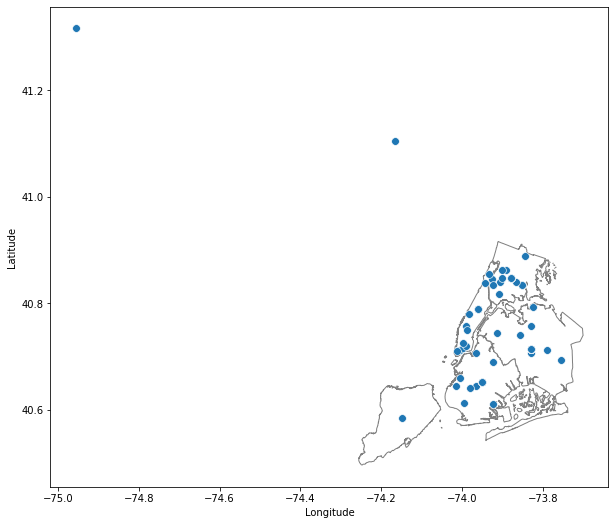

In [ ]:
!pip install geopandas

import geopandas as gpd
from shapely import wkt
nyc = gpd.read_file(gpd.datasets.get_path('nybb'))
nyc.head(5)

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

df_wm = nyc.to_crs(epsg=4326)
fig,ax = plt.subplots(1,1, figsize=(10,10))
base = df_wm.plot(color='white', edgecolor='grey', ax=ax)
sns.scatterplot(x='Longitude', y='Latitude',s=60, data=df_crimes_coor)
plt.show()

In [ ]:
#viewing entire tweets
pd.set_option('max_rows', 99999)
pd.set_option('max_colwidth', 400)




In [ ]:
import folium
from folium.plugins import FastMarkerCluster

pointIcon_url = "http://maps.google.com/mapfiles/kml/shapes/shaded_dot.png"
icon = folium.features.CustomIcon(pointIcon_url, icon_size=(15, 15))

folium_map = folium.Map(location=[40.7,-74],
 zoom_start=11,
 tiles='CartoDB dark_matter')
FastMarkerCluster(data=list(zip(df_crimes_coor["Latitude"].values, df_crimes_coor["Longitude"].values))).add_to(folium_map)
folium.LayerControl().add_to(folium_map)



folium_map

In [ ]:
# saving the map as a HTML file
folium_map.save(outfile= "folium_output.html")

In [ ]:
# getting borough-wise stats
brooklyn=0
manhattan=0
bronx=0
statenIsland=0
queens=0
print(df_crimes_coor.shape)
for i in df_crimes_coor['Location']:
  i=[x.lower() for x in i]
  if 'brooklyn' in i:
    brooklyn=brooklyn+1
  if 'manhattan' in i:
    manhattan=manhattan+1
  if 'bronx' in i:
    bronx=bronx+1
  if 'queens' in i:
    queens=queens+1
  if 'staten island' in i:
    statenIsland=statenIsland+1

print("No. of crimes in Brooklyn: ",brooklyn)
print("No. of crimes in Bronx: ",bronx)
print("No. of crimes in Manhattan: ",manhattan)
print("No. of crimes in Queens: ",queens)
print("No. of crimes in Staten Island: ",statenIsland)

(96, 4)
No. of crimes in Brooklyn:  22
No. of crimes in Bronx:  28
No. of crimes in Manhattan:  7
No. of crimes in Queens:  20
No. of crimes in Staten Island:  1


In [ ]:
# adding predicted labels to manually labelled dataset
df_with_labels = pd.read_csv('df_original_highlighted_csv.csv')
df_with_labels["Crime_detected"] = bitmap_results
df_with_labels

FileNotFoundError: ignored

In [ ]:
# making confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(df_with_labels["Crime"], df_with_labels["Crime_detected"])

In [ ]:
tn, fp, fn, tp = confusion_matrix(df_with_labels["Crime"], df_with_labels["Crime_detected"]).ravel()
(tn, fp, fn, tp)

In [ ]:
from sklearn import metrics
print(metrics.classification_report(df_with_labels["Crime"], df_with_labels["Crime_detected"], labels=[1,0]))